In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.covariance import MinCovDet
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import t, f, chi2
%matplotlib inline

In [6]:
-version

NameError: name 'version' is not defined

$\textbf{Empirical Exercise-Week 9}$  Econometric analysis of stock market dynamics. File: shanghai.csv. Text:p. 632, 14.36

In [3]:
Tab1 = pd.read_csv('shanghai.csv')

In [4]:
date1 = np.array(Tab1.iloc[:,0]); returns = np.array(Tab1.iloc[:,1])

In [6]:
print(returns.shape)

(5064,)


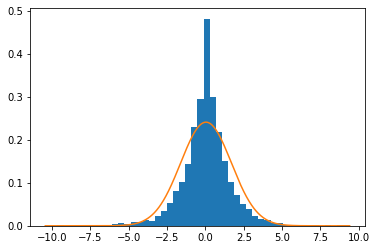

In [7]:
from scipy.stats import norm
plt.hist(returns,density=True,bins=50)
minr=min(returns)
maxr=max(returns)
xarray=np.linspace(minr,maxr,len(returns))
yarray=norm.pdf(xarray,np.mean(returns),np.std(returns,ddof=1))
plt.plot(xarray,yarray)

Notice the excess kurtosis and fat tails (skewness)

In [8]:
from scipy import stats
[jbvalue, pval]= stats.jarque_bera(returns)

In [9]:
[jbvalue, pval] #jbvalue is the test statistic

[5586.516034875546, 0.0]

Reject normality hypothesis for returns.

Since Python doesn't have corresponding arch models as Matlab. The Matlab notebook is better for reference.

In [10]:
from arch import arch_model
help(arch_model)

Help on function arch_model in module arch.univariate.mean:

arch_model(y: Union[numpy.ndarray, pandas.core.frame.DataFrame, pandas.core.series.Series, NoneType], x: Union[numpy.ndarray, pandas.core.frame.DataFrame, pandas.core.series.Series, NoneType] = None, mean: str = 'Constant', lags: Union[int, List[int], numpy.ndarray, NoneType] = 0, vol: str = 'Garch', p: Union[int, List[int]] = 1, o: int = 0, q: int = 1, power: float = 2.0, dist: str = 'Normal', hold_back: Union[int, NoneType] = None, rescale: Union[bool, NoneType] = None) -> arch.univariate.mean.HARX
    Initialization of common ARCH model specifications
    
    Parameters
    ----------
    y : {ndarray, Series, None}
        The dependent variable
    x : {np.array, DataFrame}, optional
        Exogenous regressors.  Ignored if model does not permit exogenous
        regressors.
    mean : str, optional
        Name of the mean model.  Currently supported options are: 'Constant',
        'Zero', 'LS', 'AR', 'ARX', 'HAR' an

In [11]:
EstMdl = arch_model(returns, vol='Garch', p=1,q=1).fit()
EstMdl.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 9170.248543051272
Iteration:      2,   Func. Count:     17,   Neg. LLF: 9164.449890781572
Iteration:      3,   Func. Count:     27,   Neg. LLF: 9164.400802893135
Iteration:      4,   Func. Count:     34,   Neg. LLF: 9159.664708763377
Iteration:      5,   Func. Count:     41,   Neg. LLF: 9155.293740125857
Iteration:      6,   Func. Count:     48,   Neg. LLF: 9152.877424379813
Iteration:      7,   Func. Count:     55,   Neg. LLF: 9149.950600677954
Iteration:      8,   Func. Count:     62,   Neg. LLF: 9148.261643780479
Iteration:      9,   Func. Count:     70,   Neg. LLF: 9148.107404116017
Iteration:     10,   Func. Count:     77,   Neg. LLF: 9147.649282091148
Iteration:     11,   Func. Count:     84,   Neg. LLF: 9147.582113211425
Iteration:     12,   Func. Count:     91,   Neg. LLF: 9147.552887403006
Iteration:     13,   Func. Count:     97,   Neg. LLF: 9147.552632409559
Iteration:     14,   Func. Count:    103,   Neg. LLF: 9147.55259

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -9147.55
Distribution:                  Normal   AIC:                           18303.1
Method:            Maximum Likelihood   BIC:                           18329.2
                                        No. Observations:                 5064
Date:                Wed, Apr 22 2020   Df Residuals:                     5060
Time:                        12:04:48   Df Model:                            4
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0270  1.977e-02      1.366      0.172 [-1.175e-02,6.575e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0274  1.225e-02      2.237  2.531e-02 [3.390e-03,5.141e-02]
alpha[1]       0.0618  1.387e-02      4.454  8.446e-06 [3.459e-02,8.896e-02]
beta[1]        0.9295  1.739e-02     53.463      0.000     [  0.895,  0.964]
============================================================================

Covariance estimator: robust
"""

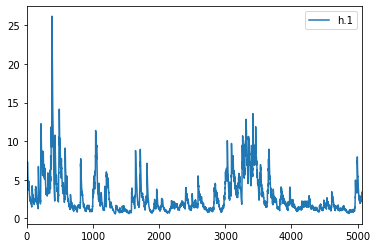

In [36]:
forecasts = EstMdl.forecast(start = 0, method='simulation')
forecasts.variance.plot()

In [48]:
EstMdl2 = arch_model(returns, p=1, q=1, o=1, vol='Garch').fit()
EstMdl2.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 9161.833964821912
Iteration:      2,   Func. Count:     18,   Neg. LLF: 9160.074302881814
Iteration:      3,   Func. Count:     27,   Neg. LLF: 9156.663838703702
Iteration:      4,   Func. Count:     37,   Neg. LLF: 9156.234564002416
Iteration:      5,   Func. Count:     45,   Neg. LLF: 9152.539844256564
Iteration:      6,   Func. Count:     53,   Neg. LLF: 9150.053453034867
Iteration:      7,   Func. Count:     61,   Neg. LLF: 9148.371624338059
Iteration:      8,   Func. Count:     69,   Neg. LLF: 9145.591149405773
Iteration:      9,   Func. Count:     78,   Neg. LLF: 9145.533072875613
Iteration:     10,   Func. Count:     86,   Neg. LLF: 9145.389042611396
Iteration:     11,   Func. Count:     94,   Neg. LLF: 9145.20978926809
Iteration:     12,   Func. Count:    101,   Neg. LLF: 9145.187013739145
Iteration:     13,   Func. Count:    108,   Neg. LLF: 9145.186638564832
Iteration:     14,   Func. Count:    115,   Neg. LLF: 9145.186588

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                      y   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -9145.19
Distribution:                  Normal   AIC:                           18300.4
Method:            Maximum Likelihood   BIC:                           18333.0
                                        No. Observations:                 5064
Date:                Wed, Apr 22 2020   Df Residuals:                     5059
Time:                        13:05:43   Df Model:                            5
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0192  1.962e-02      0.977      0.329 [-1.929e-02,5.760e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0274  1.203e-02      2.279  2.268e-02  [3.837e-03,5.100e-02]
alpha[1]       0.0540  1.249e-02      4.321  1.555e-05  [2.949e-02,7.845e-02]
gamma[1]       0.0153  1.102e-02      1.384      0.166 [-6.348e-03,3.686e-02]
beta[1]        0.9296  1.689e-02     55.033      0.000      [  0.896,  0.963]
=============================================================================

Covariance estimator: robust
"""

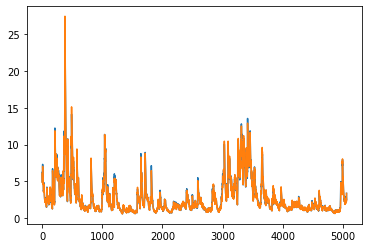

In [56]:
forecasts2 = EstMdl2.forecast(start = 0, method='simulation')
plt.plot(range(5064), forecasts.variance)
plt.plot(range(5064), forecasts2.variance)
plt.show()

Confidence intervals under the two estimates

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


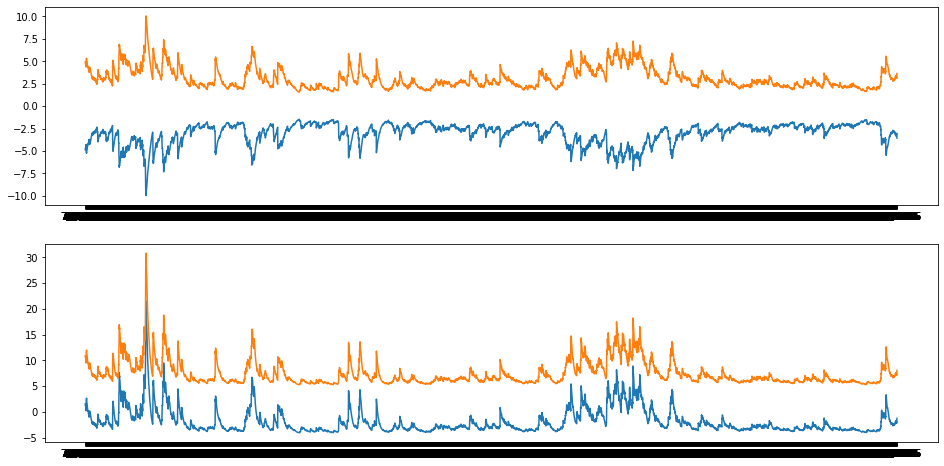

In [66]:
V = forecasts.variance
V2 = forecasts2.variance
ymean1 = np.mean(returns) - 1.96 * V**0.5
ymean2 = np.mean(returns) + 1.96 * V**0.5
vol1  =  V - 1.96 * np.std(V)
vol2 =   V + 1.96 * np.std(V)

plt.figure(figsize=(16,8))
plt.subplot(211)
ax1 = plt.subplot(2,1,1)
plt.plot(date1, ymean1)
plt.plot(date1, ymean2)
ax2 = plt.subplot(2,1,2)
plt.plot(date1, vol1)
plt.plot(date1, vol2)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


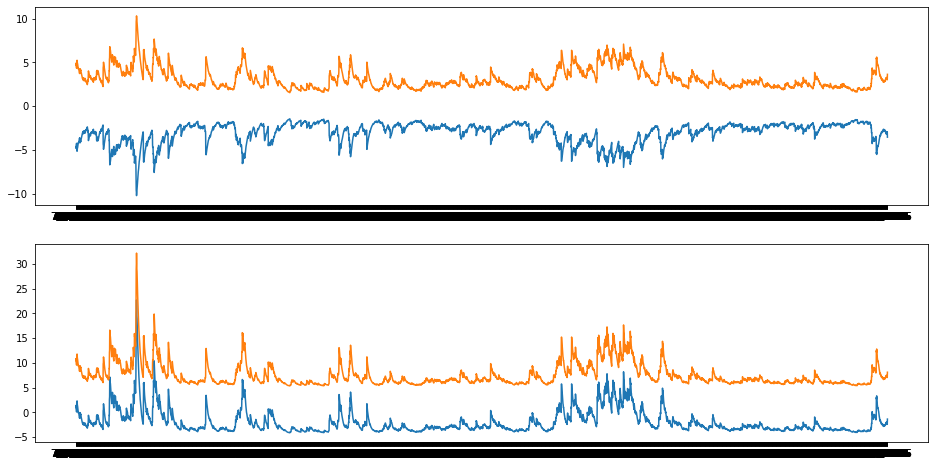

In [67]:
ymean1 = np.mean(returns) - 1.96 * V2**0.5
ymean2 = np.mean(returns) + 1.96 * V2**0.5
vol1  =  V2 - 1.96 * np.std(V2)
vol2 =   V2 + 1.96 * np.std(V2)

plt.figure(figsize=(16,8))
plt.subplot(211)
ax1 = plt.subplot(2,1,1)
plt.plot(date1, ymean1)
plt.plot(date1, ymean2)
ax2 = plt.subplot(2,1,2)
plt.plot(date1, vol1)
plt.plot(date1, vol2)